<a href="https://colab.research.google.com/github/alorrojayann/ComputerVision-CrashCourse/blob/main/Line%20and%20Circle%20Detection/(Alorro)%20Activity%205%20Line%20and%20Circle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advance Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Alorro, Jay-ann
**Section** | CPE32S3
**Date Performed**: | 02/20/25
**Date Submitted**: | 02/21/25
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

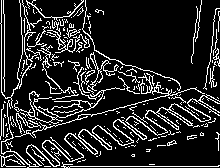

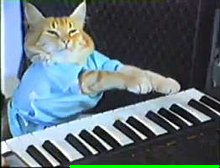

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

**Answers:**

1. The line of code responsible for the minimum line lenght is the variable minLineLength which is set to 20 and is passed to cv2.HoughLinesP().
2. The mathematical formula for Hough transfor is: ρ=xcosθ+ysinθ. It finds lines by transforming the edge points in the image into sinusoidal curve using the Hough equation. This process is repeated and an accumulator matrix is created which stores the number of voted each possible line receives. The lines that accumulate the most voites correspond to the most prominent linear features in the image.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

- The HoughCircles() function is used to detect circular shapes in an image using the Hough Circle Transform. Its parameters include: image, method, dp, minDist, param1, param2, minRadius, maxRadius.

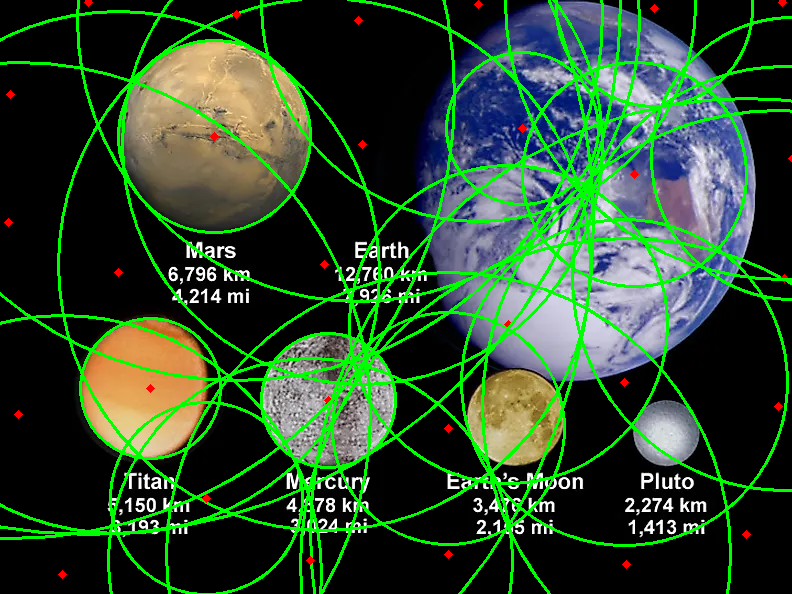

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

- When the value is set to 5, the circles that are in the image are a lot an is messy. There are a lot of circles produced but only traced 3 out of 6 planets present in the image.

Change the value to 9, **what happens to the image**?

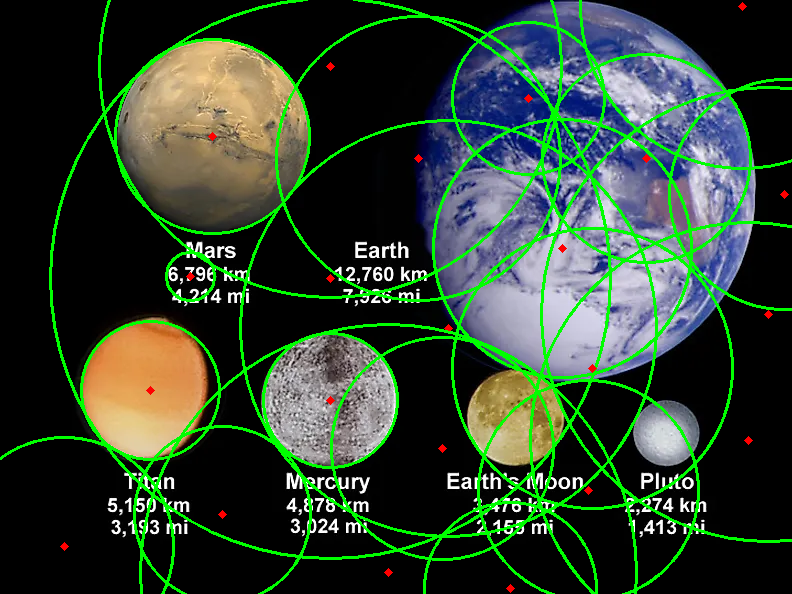

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

- When we changed the value to 9, the circles lessen but it still had a low accuracy in detecting the circles in the image which is the planets.

Lastly, change the value to 15, **what can you say about the resulting image?**

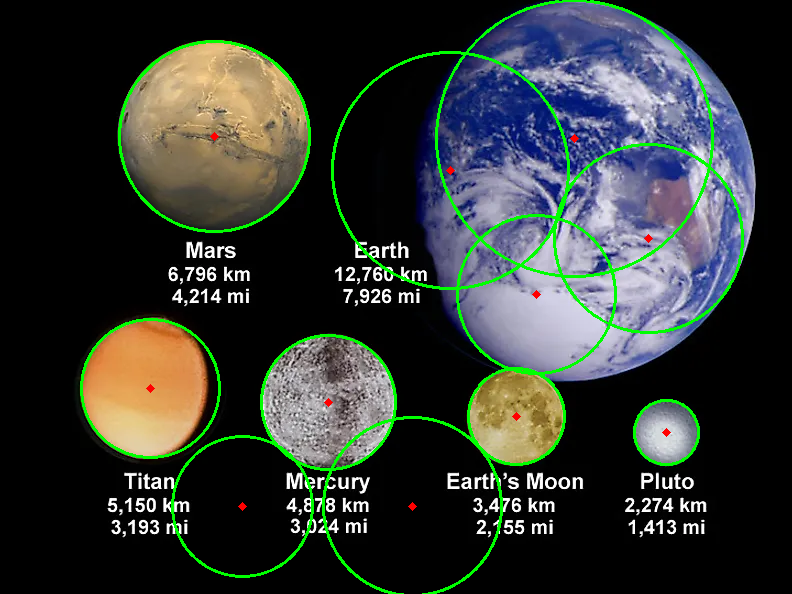

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

- The value of 15 had the most promising result because it traced 5 out of 6 planets in the photo. However, the earth doesn't have it's own circle and there are a lot of circle that doesn't trace any object or in this case, planet.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

- It seems that a higher n value improves the circle detection. The image might also be a factor though the image used has a solid background, playing with the parameters and finding the best one might just be the way in order to accurately detect the circles in the image.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

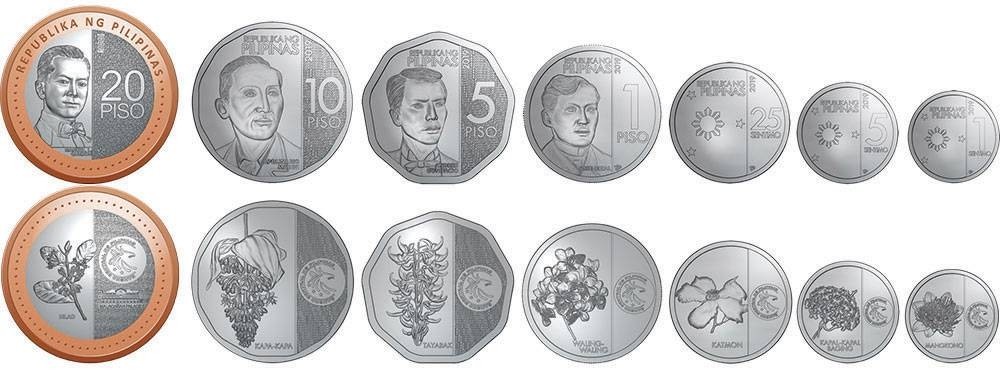

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

In [ ]:
coins_img = cv2.imread('/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/coins.jpg')
coins_gray = cv2.cvtColor(coins_img, cv2.COLOR_BGR2GRAY)

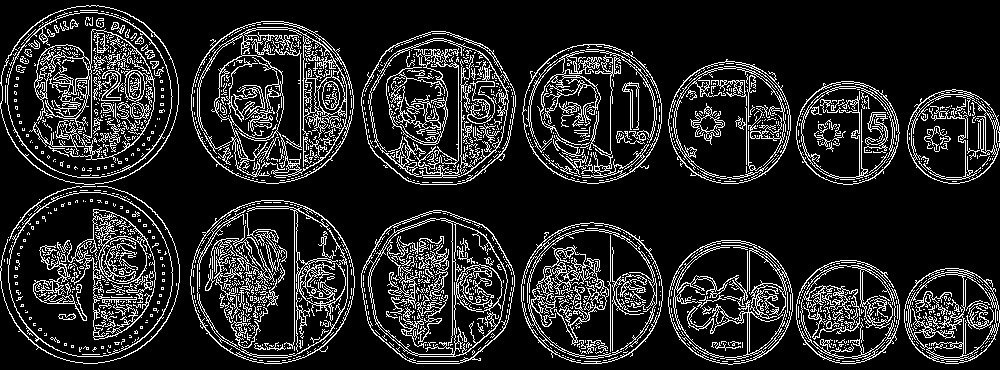

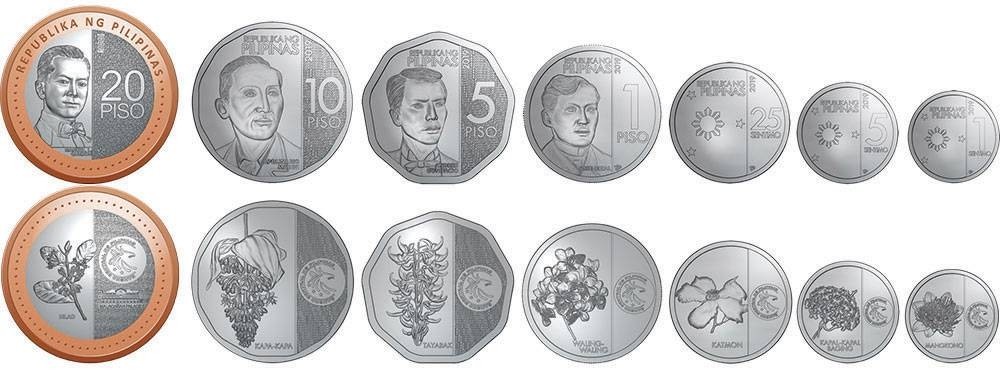

In [ ]:
# line detection
coins_edges = cv2.Canny(coins_gray, 50, 150)
minLineLength = 20
maxLineGap = 5
coins_lines = cv2.HoughLinesP(coins_edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
line_img = img.copy()
if coins_lines is not None:
    for line in coins_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

coins_line_path = "/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/coins_lines.jpg"
cv2.imwrite(coins_line_path, line_img)

cv2_imshow(coins_edges)
cv2_imshow(coins_img)

*Analysis*

- The output is the same as the one we did in the procedures. The image turned black and the outline is then highlighted by a white line revealing the details the coins in the picture has.
- I don't think you can count circles using houghlines because it is used to detect straight lines and not circular shapes which do not have straight edges.

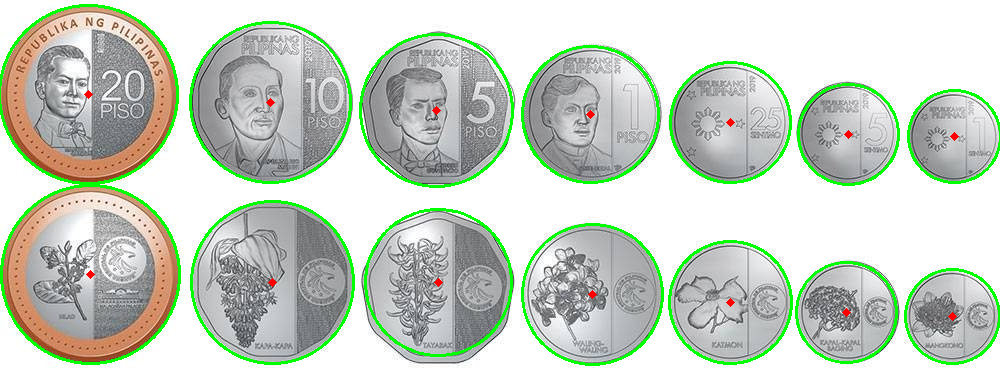

In [ ]:
# circle detection
n = 13

gray_blur = cv2.medianBlur(coins_gray, n)
coins_circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=100, param2=30, minRadius=10, maxRadius=100)
circle_img = coins_img.copy()
if coins_circles is not None:
    coins_circles = np.uint16(np.around(coins_circles))
    for i in coins_circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)

coins_circles_path = "/content/drive/MyDrive/CPE 313/discussion 3.1/act 5/coins_circles.jpg"
cv2.imwrite(coins_circles_path, circle_img)

cv2_imshow(circle_img)

In [ ]:
# circle count
circle_count = len(coins_circles[0]) if coins_circles is not None else 0
circle_count

14

*Analysis*

- The output is perfect with a green circle outlining each coins that is present in the image. I used an n value of 13 which is the perfect value in order for it to detect all the circles prepsent in the image.
- Yes, you can count the circles in the image using houghcircles with the line of code above which outputs how many circles it detected in the picture which is 14, which is also the number of coins in the photo.

## 5. Summary, Conclusions and Lessons Learned

This activity is all about line and circle detection using OpenCV and its Hough Transform technique. It helped me understand how to detect geometric shaped in images and this activity covers fundamental concepts, practical implementations, and application of line and circle detection in computer vision. This activity showed me skills in detecting and analyzing geometric structures within images using OpenCV function. I learned how the Hough Transform algorithm works and how to apply it for identifying lines and circles. The techniques present are essential in the applications of computer vision such as object recognition.

In conclusion, the things that I have learned from doing this activity are the principles of Hough Transform and its importance in shape detection. How to use OpenCV's HoughLines and HoughCircles functions for detecting lines and circle. The role of edge detection which is a preprocessing step and the practical application of line and circle detection in real-world scenarios.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*